<a href="https://colab.research.google.com/github/jnsbrdbr/andrew-ng/blob/master/regularize_L_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.7.0


In [2]:
import os

# Scientific and vector computation for python
import numpy as np
import pandas as pd
import io
import seaborn as sns

# Plotting library
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces
import matplotlib.pyplot as plt

In [3]:
!wget https://raw.githubusercontent.com/susilvaalmeida/machine-learning-andrew-ng/master/data/ex2data2.txt
data=pd.read_csv('ex2data2.txt',header=None,error_bad_lines=False)

--2021-11-11 15:56:12--  https://raw.githubusercontent.com/susilvaalmeida/machine-learning-andrew-ng/master/data/ex2data2.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2233 (2.2K) [text/plain]
Saving to: ‘ex2data2.txt’

ex2data2.txt        100%[===================>]   2.18K  --.-KB/s    in 0s      

2021-11-11 15:56:12 (16.6 MB/s) - ‘ex2data2.txt’ saved [2233/2233]



In [5]:
data.columns=('test1','test2','label')
data.describe().T

,count,mean,std,min,25%,50%,75%,max
test1,118.0,0.054779,0.496654,-0.83007,-0.372120,-0.006336,0.478970,1.0709
test2,118.0,0.183102,0.519743,-0.76974,-0.254385,0.213455,0.646562,1.1089
label,118.0,0.491525,0.502060,0.00000,0.000000,0.000000,1.000000,1.0000


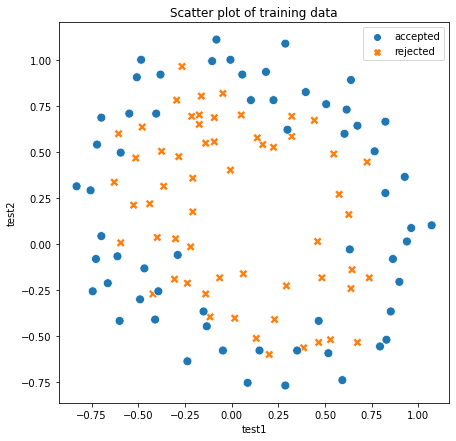

In [12]:
plt.figure(figsize=(7,7))
ax=sns.scatterplot(x='test1',y='test2',hue='label',style='label',s=80,data=data)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[0:], ['accepted', 'rejected'])
plt.title('Scatter plot of training data')
plt.show(ax)

In [28]:
def sigmoid(z):
    z = np.array(z)
    return 1 / (1+np.exp(-z))

In [19]:
#feature_mapping
def map_feature(X1,X2,degree):
  X1=np.array(X1).reshape(-1,1)
  X2=np.array(X2).reshape(-1,1)
  
  out = np.ones((X1.shape[0], 1))
  for i in range (1,degree+1):
    for j in range (0,i+1):
       p = (X1**(i-j)) * (X2**j)
       out = np.append(out, p, axis=1)
  return out

In [21]:
X_p=map_feature(data.test1.values,data.test2.values,6)
X_p.shape

(118, 28)

In [32]:
def cost_function_reg(theta, X, y, lambda_reg):
    m = y.shape[0]
    theta = theta[:, np.newaxis] 
    h = sigmoid(X.dot(theta))
    J = (1/m) * (-y.T.dot(np.log(h)) - (1-y).T.dot(np.log(1-h))) + (lambda_reg/(2*m)) * np.sum(theta[1:]**2)

    diff_hy = h - y
    grad = (1/m) * diff_hy.T.dot(X) + ((lambda_reg/m) * theta.T)
    #grad[0, 0] = (1/m) * diff_hy.T.dot(X[:, 0])

    return J, grad

In [33]:
import scipy.optimize as opt
def optimize_theta_reg(X, y, initial_theta, lambda_reg):
    opt_results = opt.minimize(cost_function_reg, initial_theta, args=(X, y, lambda_reg), method='TNC', jac=True, options={'maxiter':400})
    return opt_results['x'], opt_results['fun']

In [34]:
m = data.shape[0]
X = X_p
y = np.array(data.label.values).reshape(-1,1)
initial_theta = np.zeros(shape=(X.shape[1]))
print(initial_theta)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [35]:
lambda_reg = 1
cost, grad = cost_function_reg(initial_theta, X, y, lambda_reg)
print('Cost at initial theta (zeros):', cost)
print('Expected cost (approx): 0.693')
print('Gradient at initial theta (zeros) :')
print(grad.T[:])

Cost at initial theta (zeros): [[0.69314718]]
Expected cost (approx): 0.693
Gradient at initial theta (zeros) :
[[8.47457627e-03]
 [1.87880932e-02]
 [7.77711864e-05]
 [5.03446395e-02]
 [1.15013308e-02]
 [3.76648474e-02]
 [1.83559872e-02]
 [7.32393391e-03]
 [8.19244468e-03]
 [2.34764889e-02]
 [3.93486234e-02]
 [2.23923907e-03]
 [1.28600503e-02]
 [3.09593720e-03]
 [3.93028171e-02]
 [1.99707467e-02]
 [4.32983232e-03]
 [3.38643902e-03]
 [5.83822078e-03]
 [4.47629067e-03]
 [3.10079849e-02]
 [3.10312442e-02]
 [1.09740238e-03]
 [6.31570797e-03]
 [4.08503006e-04]
 [7.26504316e-03]
 [1.37646175e-03]
 [3.87936363e-02]]


In [46]:
opt_theta, cost = optimize_theta_reg(X, y, initial_theta,lambda_reg)

In [47]:
print('Cost at theta found by fminunc:', cost)
print('theta:\n', opt_theta.reshape(-1,1))

Cost at theta found by fminunc: [[0.52958106]]
theta:
 [[ 1.14796973]
 [ 0.60123865]
 [ 1.17054749]
 [-1.88314152]
 [-0.91466266]
 [-1.26550213]
 [ 0.12673847]
 [-0.36683793]
 [-0.34725846]
 [-0.1806055 ]
 [-1.42423138]
 [-0.05779465]
 [-0.60630949]
 [-0.26719009]
 [-1.16593349]
 [-0.2350103 ]
 [-0.20754902]
 [-0.05006084]
 [-0.27921488]
 [-0.28299115]
 [-0.47646037]
 [-1.02992716]
 [ 0.02411284]
 [-0.293788  ]
 [ 0.01238266]
 [-0.32816843]
 [-0.13343902]
 [-0.93372181]]


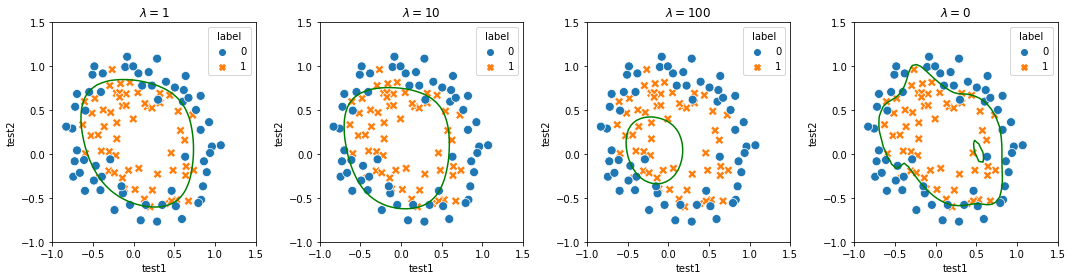

In [38]:
lambda_reg = [1, 10, 100, 0]
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(15,4))
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)

for il, l in enumerate(lambda_reg):
    theta_opt, cost = optimize_theta_reg(X, y, initial_theta, l)
    z = np.zeros((u.shape[0], v.shape[0]))
    for i in range(len(u)):
        for j in range(len(v)):
            z[i,j] = map_feature(u[i], v[j], 6).dot(theta_opt)
    
    sns.scatterplot(x='test1', y='test2', hue='label', data=data, style='label', s=80, ax=axs[il])
    
    axs[il].contour(u, v, z.T, levels=[0], colors='green')
    axs[il].set_title('$\lambda={}$'.format(l))
fig.tight_layout()
plt.show()

In [40]:
lambda_reg = 1
theta, cost = optimize_theta_reg(X, y, initial_theta, lambda_reg)
theta

array([ 1.14796973,  0.60123865,  1.17054749, -1.88314152, -0.91466266,
       -1.26550213,  0.12673847, -0.36683793, -0.34725846, -0.1806055 ,
       -1.42423138, -0.05779465, -0.60630949, -0.26719009, -1.16593349,
       -0.2350103 , -0.20754902, -0.05006084, -0.27921488, -0.28299115,
       -0.47646037, -1.02992716,  0.02411284, -0.293788  ,  0.01238266,
       -0.32816843, -0.13343902, -0.93372181])

In [48]:
def predict(X,theta):
  y_pred = [1 if sigmoid(X[i, :].dot(theta)) >= 0.5 else 0 for i in range(0, X.shape[0])]
  return y_pred

In [50]:
y_pred_prob = predict(X, theta)
f'Train accuracy: {np.mean(y_pred_prob == data.label.values) * 100}'

'Train accuracy: 83.05084745762711'